https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Hotel Reservations.csv')

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [2]:
df = df.drop('Booking_ID', axis=1)

categorical_cols = df.select_dtypes(exclude=['int', 'float']).columns

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

encoded_data = ohe.fit_transform(df[categorical_cols[:-1]])
encoded_data.head()

df = pd.concat([df, encoded_data], axis=1).drop(columns=categorical_cols[:-1])
df['booking_status'] = df['booking_status'].replace({'Not_Canceled': 0, 'Canceled': 1})

In [3]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0,2,3,0,5,2018,11,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,2,1,0,1,2018,2,28,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,0,0,2,0,211,2018,5,20,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,0,1,1,0,48,2018,4,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['booking_status'])
y = df['booking_status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

1. Повнозв'язані нейронні мережі

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7189 - loss: 0.5314 - val_accuracy: 0.8121 - val_loss: 0.4051
Epoch 2/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8207 - loss: 0.3950 - val_accuracy: 0.8256 - val_loss: 0.3869
Epoch 3/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8297 - loss: 0.3791 - val_accuracy: 0.8312 - val_loss: 0.3742
Epoch 4/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8348 - loss: 0.3726 - val_accuracy: 0.8314 - val_loss: 0.3688
Epoch 5/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8352 - loss: 0.3631 - val_accuracy: 0.8351 - val_loss: 0.3612
Epoch 6/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8405 - loss: 0.3546 - val_accuracy: 0.8397 - val_loss: 0.3580
Epoch 7/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8439 - loss: 0.3483 - val_accuracy: 0.8408 - val_loss: 0.3515
Epoch 8/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8470 - loss: 0.3457 - val_accuracy: 0.

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Aaccuracy: {accuracy}')

print('Classification report:')
print(classification_report(y_test, y_pred_classes))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_classes))

227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step
Aaccuracy: 0.8512749827705031
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4839
           1       0.79      0.76      0.77      2416

    accuracy                           0.85      7255
   macro avg       0.83      0.83      0.83      7255
weighted avg       0.85      0.85      0.85      7255

Confusion matrix:
[[4339  500]
 [ 579 1837]]


Попередні результати (RandomForest)

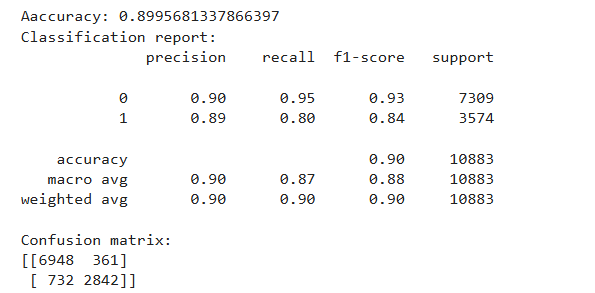

2. Згорткові нейронні мережі

https://www.kaggle.com/datasets/puneet6060/intel-image-classification

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

train_dir = 'Intel Image Classification\seg_train'
test_dir = 'Intel Image Classification\seg_test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


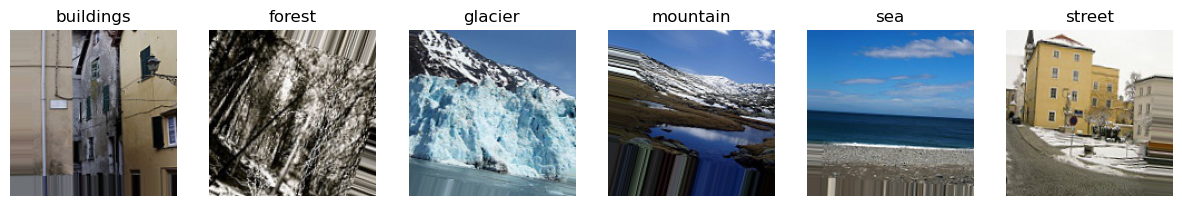

In [9]:
import matplotlib.pyplot as plt

images, labels = next(train_generator)

class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}

plt.figure(figsize=(15, 5))

for i, class_name in enumerate(class_labels.values()):
    idx = (labels[:, i] == 1).argmax()
    plt.subplot(1, 6, i+1)
    plt.imshow(images[idx])
    plt.axis('off')
    plt.title(class_name)

plt.show()

a) From scratch

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 140s 318ms/step - accuracy: 0.4849 - loss: 1.2873 - val_accuracy: 0.6784 - val_loss: 0.8387
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5625 - loss: 1.1658 - val_accuracy: 0.7154 - val_loss: 0.7749
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 129s 294ms/step - accuracy: 0.6684 - loss: 0.8746 - val_accuracy: 0.7537 - val_loss: 0.6790
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6562 - loss: 0.7932 - val_accuracy: 0.7544 - val_loss: 0.6777
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 130s 297ms/step - accuracy: 0.7353 - loss: 0.7226 - val_accuracy: 0.7863 - val_loss: 0.5852
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7812 - loss: 0.5879 - val_accuracy: 0.7809 - val_loss: 0.5830
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 134s 305ms/step - accuracy: 0.7667 - loss: 0.6445 - val_accuracy: 0.8007 - val_loss: 0.5696
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7188 - loss: 0.695

b) Transfer learning

In [12]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(6, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 107s 241ms/step - accuracy: 0.7837 - loss: 0.6157 - val_accuracy: 0.8985 - val_loss: 0.2715
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9062 - loss: 0.3300 - val_accuracy: 0.8965 - val_loss: 0.2748
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 102s 232ms/step - accuracy: 0.8860 - loss: 0.3179 - val_accuracy: 0.9002 - val_loss: 0.2634
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8438 - loss: 0.5048 - val_accuracy: 0.9036 - val_loss: 0.2583
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 100s 229ms/step - accuracy: 0.8975 - loss: 0.2835 - val_accuracy: 0.9089 - val_loss: 0.2477
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8438 - loss: 0.3251 - val_accuracy: 0.9103 - val_loss: 0.2513
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 101s 231ms/step - accuracy: 0.9049 - loss: 0.2720 - val_accuracy: 0.9133 - val_loss: 0.2354
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 1.0000 - loss: 0

3. Рекурентні нейронні мережі

https://www.kaggle.com/datasets/kazanova/sentiment140

In [14]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', names=columns)

df = df[['target', 'text']]

df['target'] = df['target'].replace({4: 2, 2: 1})

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text.strip()

df['text'] = df['text'].apply(clean_text)

In [15]:
max_vocab = 5000
max_len = 50

tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['target'], test_size=0.2, random_state=42)

a) From scratch

In [16]:
from tensorflow.keras.layers import Embedding, LSTM

model = Sequential([
    Embedding(input_dim=max_vocab, output_dim=64, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=3,
    batch_size=64
)

Epoch 1/3
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 557s 28ms/step - accuracy: 0.8181 - loss: 0.3973 - val_accuracy: 0.8193 - val_loss: 0.3952
Epoch 2/3
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 573s 29ms/step - accuracy: 0.8290 - loss: 0.3788 - val_accuracy: 0.8211 - val_loss: 0.3915
Epoch 3/3
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 603s 30ms/step - accuracy: 0.8372 - loss: 0.3636 - val_accuracy: 0.8234 - val_loss: 0.3900


b) Pretrained word embeddings

In [21]:
import numpy as np

def load_glove_embeddings(glove_file, embedding_dim=100):
    embeddings_index = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector
    return embeddings_index

glove_file = 'glove.6B.100d.txt'

embedding_dim = 100
embeddings_index = load_glove_embeddings(glove_file, embedding_dim)

tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(df['text'])

embedding_matrix = np.zeros((max_vocab, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_vocab:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [22]:
model = Sequential([
    Embedding(input_dim=max_vocab, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False),  # Використовуємо GloVe вектори
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/3
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 582s 29ms/step - accuracy: 0.7891 - loss: 0.4473 - val_accuracy: 0.8029 - val_loss: 0.4239
Epoch 2/3
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 582s 29ms/step - accuracy: 0.8123 - loss: 0.4083 - val_accuracy: 0.8132 - val_loss: 0.4077
Epoch 3/3
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 628s 31ms/step - accuracy: 0.8207 - loss: 0.3927 - val_accuracy: 0.8144 - val_loss: 0.4039
